<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#X.-Functions" data-toc-modified-id="X.-Functions-1">X. Functions</a></span><ul class="toc-item"><li><span><a href="#X.1-missing_values_table()" data-toc-modified-id="X.1-missing_values_table()-1.1">X.1 missing_values_table()</a></span></li><li><span><a href="#X.2-drop_cols()" data-toc-modified-id="X.2-drop_cols()-1.2">X.2 drop_cols()</a></span></li></ul></li><li><span><a href="#1.-Data" data-toc-modified-id="1.-Data-2">1. Data</a></span></li><li><span><a href="#2.-Pearson-Correlation" data-toc-modified-id="2.-Pearson-Correlation-3">2. Pearson Correlation</a></span></li><li><span><a href="#3.-Outliers" data-toc-modified-id="3.-Outliers-4">3. Outliers</a></span></li><li><span><a href="#4.-EDA" data-toc-modified-id="4.-EDA-5">4. EDA</a></span></li><li><span><a href="#5.-Short-Summary" data-toc-modified-id="5.-Short-Summary-6">5. Short Summary</a></span></li></ul></div>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

## X. Functions

### X.1 missing_values_table()

In [2]:
# Define a function to visulize the features with missing values, and % of total values, & datatype
def missing_values_table(df):
     # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_type = df.dtypes
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)
        
     # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

### X.2 drop_cols()

In [3]:
def drop_cols(cols):
    df.drop(labels=cols, axis=1, inplace=True)

## 1. Data

The data has been cleaned in Part1 in some ways, we will load the data from part1 directly and check some basic information.

In [4]:
df = pd.read_pickle('../Data/part1_clean_data_16_18.pkl')

In [5]:
df.sample(5)

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,...,all_util,inq_fi,total_cu_tl,inq_last_12m,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,pub_rec_bankruptcies,IssueDate,fico_score
2163619,16000.0,36,15.99,562.44,C5,RENT,50000.0,Not Verified,Fully Paid,debt_consolidation,...,58.0,2.0,0.0,4.0,127.0,190.0,0.0,0.0,2016-12-01,692.0
1946544,1500.0,36,12.79,50.39,C1,RENT,51000.0,Verified,Fully Paid,other,...,68.0,0.0,10.0,1.0,157.0,146.0,2.0,0.0,2016-09-01,682.0
1111219,29325.0,60,19.48,768.48,E2,MORTGAGE,110000.0,Source Verified,Fully Paid,debt_consolidation,...,78.0,2.0,3.0,5.0,143.0,134.0,3.0,0.0,2016-01-01,702.0
2051193,20000.0,36,6.08,609.17,A2,MORTGAGE,106000.0,Source Verified,Fully Paid,major_purchase,...,58.0,2.0,0.0,3.0,129.0,234.0,3.0,0.0,2017-12-01,772.0
549936,32000.0,36,17.09,1142.33,D1,MORTGAGE,60000.0,Source Verified,Charged Off,home_improvement,...,35.0,2.0,0.0,2.0,75.0,25.0,0.0,0.0,2017-09-01,702.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517579 entries, 421101 to 2260697
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             517579 non-null  float64       
 1   term                  517579 non-null  int8          
 2   int_rate              517579 non-null  float64       
 3   installment           517579 non-null  float64       
 4   sub_grade             517579 non-null  object        
 5   home_ownership        517579 non-null  object        
 6   annual_inc            517579 non-null  float64       
 7   verification_status   517579 non-null  object        
 8   loan_status           517579 non-null  object        
 9   purpose               517579 non-null  object        
 10  addr_state            517579 non-null  object        
 11  dti                   517579 non-null  float64       
 12  open_acc              517579 non-null  float64      

In [7]:
missing_values_table(df)

Your selected dataframe has 38 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values,type
il_util,69882,13.5,float64
mths_since_rcnt_il,13639,2.6,float64
mo_sin_old_il_acct,13639,2.6,float64


Some variables were not inspected fully in part 1, which are also not useful in the analysis(mostly they are post loan information), we drop them here. 

In [8]:
drop_list = ['open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
             'open_rv_24m', 'inq_last_12m','mths_since_rcnt_il','open_rv_12m', ]

In [9]:
drop_cols(drop_list)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517579 entries, 421101 to 2260697
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             517579 non-null  float64       
 1   term                  517579 non-null  int8          
 2   int_rate              517579 non-null  float64       
 3   installment           517579 non-null  float64       
 4   sub_grade             517579 non-null  object        
 5   home_ownership        517579 non-null  object        
 6   annual_inc            517579 non-null  float64       
 7   verification_status   517579 non-null  object        
 8   loan_status           517579 non-null  object        
 9   purpose               517579 non-null  object        
 10  addr_state            517579 non-null  object        
 11  dti                   517579 non-null  float64       
 12  open_acc              517579 non-null  float64      

## 2. Pearson Correlation 

For Pearson Correlation, we only use continuous variables.

In [17]:
list_float = df.select_dtypes(exclude=['object']).columns

In [18]:
list_float

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_bal_il', 'il_util', 'max_bal_bc', 'all_util', 'inq_fi',
       'total_cu_tl', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mort_acc',
       'pub_rec_bankruptcies', 'IssueDate', 'fico_score'],
      dtype='object')

Some variables not useful for Person correlation check, E.g., $IssueDate$

In [19]:
list_float = ['loan_amnt', 'term', 'int_rate', 'installment','annual_inc', 'dti', 
              'open_acc', 'pub_rec', 'revol_bal', 'revol_util','total_acc', 'total_bal_il', 
              'il_util', 'max_bal_bc', 'all_util', 'inq_fi','total_cu_tl','mo_sin_old_il_acct',
              'mo_sin_old_rev_tl_op', 'mort_acc','pub_rec_bankruptcies', 'fico_score']

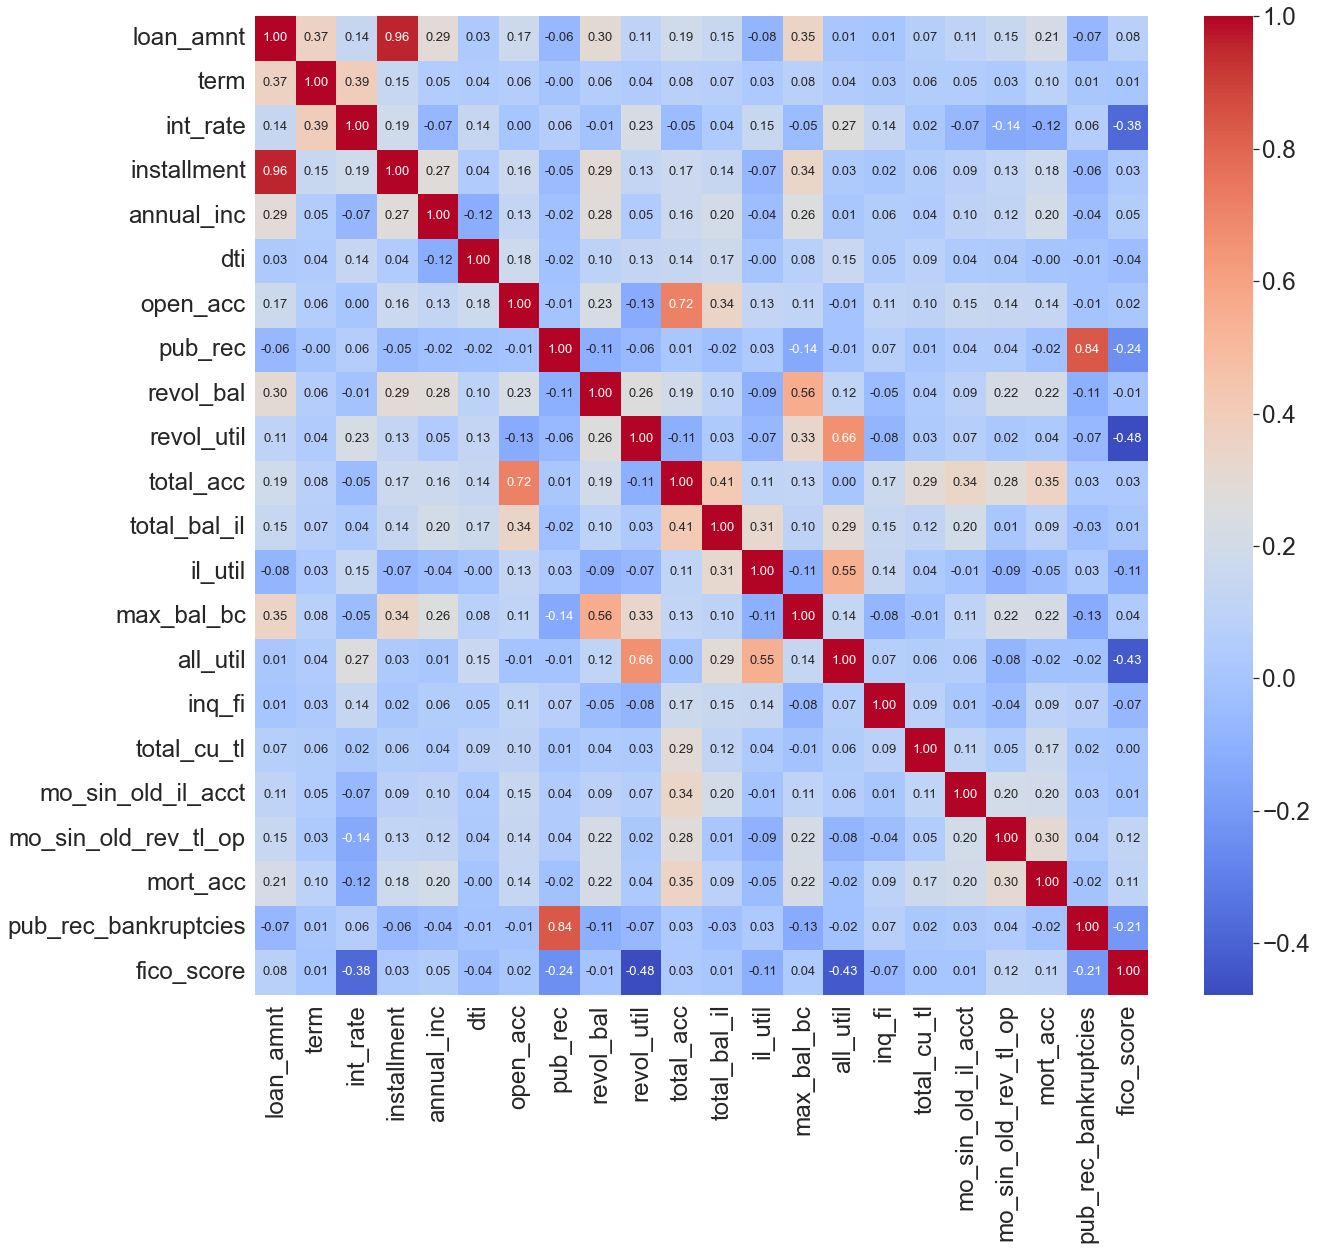

In [24]:
plt.figure(figsize = (20,18))
sns.set(font_scale = 2.2)
pearson_correlation = sns.heatmap(df[list_float].corr(), annot=True,
                      cmap = "coolwarm",
                      fmt=".2f",annot_kws={'size':13})
pearson_correlation.figure.savefig("../Figures/pearson_correlation.png") 

We see that *loan_amnt* and *installment* are highly correlated, which makes sense. Higher loan amount, more installment will be repaid each month. *loan_amnt* will be kept.  *pub_rec* and *pub_rec_bankruptcies* are highly correlated. I will keep *pub_rec_bankruptcies* only. 

In [25]:
drop_cols(['pub_rec','installment', 'open_acc'])

## 3. Outliers

In [18]:
# cols = ['loan_amnt', 'term', 'int_rate', 'emp_length',
#        'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util',
#        'total_acc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mort_acc',
#        'pub_rec_bankruptcies', 'fico_score'] # one or more

# Q1 = df[cols].quantile(0.25)
# Q3 = df[cols].quantile(0.75)
# IQR = Q3 - Q1

# new_df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

## 4. EDA

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893580 entries, 0 to 894250
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             893580 non-null  float64       
 1   term                  893580 non-null  int8          
 2   int_rate              893580 non-null  float64       
 3   sub_grade             893580 non-null  object        
 4   emp_length            835965 non-null  float64       
 5   home_ownership        893580 non-null  object        
 6   annual_inc            893580 non-null  float64       
 7   verification_status   893580 non-null  object        
 8   loan_status           893580 non-null  object        
 9   purpose               893580 non-null  object        
 10  addr_state            893580 non-null  object        
 11  dti                   893580 non-null  float64       
 12  open_acc              893580 non-null  float64       
 13 

## 5. Short Summary

In [20]:
drop_cols(['annual_inc_log','revol_bal_log'])

In [21]:
new_df.drop(labels=['annual_inc_log','revol_bal_log'], axis=1, inplace=True)

D:\Temp\ipykernel_1452\1541464828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(labels=['annual_inc_log','revol_bal_log'], axis=1, inplace=True)


In [50]:
df.to_pickle('./Data/part2_clean_data.pkl')  # where to save it, usually as a .pkl

In [22]:
new_df.to_pickle('./Data/part2_clean_data_NoOutliers.pkl')  # where to save it, usually as a .pkl